# Bagging

## 0. Introduction to Ensemble methods and Bagging 

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Bagging is an <span style='background :yellow' > ensemble method </span>used in machine learning that can be applied to almost any <span style='background :yellow' >base learner </span> model. Generally speaking, it <span style='background :yellow' > lowers the variance of the model while maintains the low bias of the model</span>. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; You may see a lot of new terminologies here that seems overwhelming. No worries, we will go over these concepts one by one. So far all you need to know it that bagging helps us develop a more reliable model. In this code assignment we will be starting from scratch and build up these concepts with yout knowledge in EE16A EE16B and CS61B.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here is the <span style='background :yellow' > outline</span> of the assignment. If you are already familiar with some concept, you can feel free to skim through the part.  
1. Machine learning Basics recap <br>
    1.1 Linear regression <br>
    1.2 Polynomial regression <br>
    1.3 Overfitting<br>
2. Bias and Variance <br>
    2.1 Bagging: an experiment <br>
    2.2 Bagging theory <br>
3. Bootstrap <br>
4. K-fold cross-validation <br>
5. Decision Tree <br>
    5.1 Overfitting <br>
    5.2 Bagged trees <br>
    5.3 Random forest <br>
    
Here we want you to assess your familiarity with EE16A/B ML. If you feel confident doing linear and polynomial regression and are familiar with ideas of overfitting, you can skim through part A. If you want to have a solid background before going further, take the time to go through these code work.  
</span>

## 1. EE16A ML Recap

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here are some useful machine learning libraries we want you to import. <span style='background :yellow' >Sklearn </span> for machine learning deploymeny, <span style='background :yellow' >Numpy </span> (often seen as np.xxx ) for efficient matrix related calculation, <span style='background :yellow' >Matplotlib
</span>(often seen as plt.xxx) for visualization. If you want to get deeper in ML, better get familiar with these libraries :))
</span>

In [115]:
import sklearn.svm as svm
import sklearn.datasets as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import sys
!{sys.executable} -m pip install mlxtend

You should consider upgrading via the '/Users/chenyuecai/anaconda3/bin/python -m pip install --upgrade pip' command.


<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">

In EE16A, we have learned about the basics of machine learning: identifying the problem of classification, estimation, prediction and clustering, mastering some linear algebra techniques to solve machine learning problem, eg. least square, optimizing a loss function. (For a quick 16A ML recap please go to https://inst.eecs.berkeley.edu/~ee16a/fa19/lecture/2019-11-12_11A.pdf ) Let's start with a set of problem that we are all familiar with in EE16A, "the line of best fit" problems. 
    
</span>

### 1.1 Linear regression 

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
In this simple exercise, we will be dealing with a toy example that helps you recap the setting of linear regression. You will also be able to bridge the gap between linear algebra and the larger setting of machine learning problem. Let's say that we are given a set of peerfectly linearly correlated data and we would like to figure out the exact formulation of their relations. We learned in the EE16A that we could formulate the problem as a least square problem and find its solution.
</span>

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
First we will implement a simple function that generates linear dataa dn we visualize the data by matplotlib. Remember it's alawys a good idea to visualize data so that you can get a better idea of it. Also remember to add legend so that you will not forget what these lines are for.
</span>

In [116]:
def gen_linear_data(w , b):
    xs, ys = [], []
    for i in range(100):
        x = 100 * random.random() - 50
        xs.append(x)
        ys.append(w * x + b)
    return xs, ys

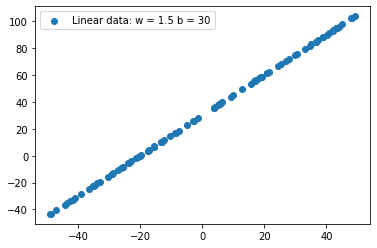

In [117]:
x_linear, y_linear = gen_linear_data(1.5 , 30)
plt.scatter(x_linear,y_linear, label = 'Linear data: w = 1.5 b = 30')
plt.legend(loc = 'upper left')

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">

Here we know $X$ and $y$ . We can then formulate the problem as $$Ax = b$$  
$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
\vdots  & \vdots \\
x_m & 1
\end{bmatrix}$$


$$b = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_m
\end{bmatrix}$$ 
</span>


<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b>Q1:</b> Derive the <span style='background :yellow' >algebric solution</span> to the Least square problem.

In [118]:
x_linear_feat = np.vstack([x_linear, np.ones(len(x_linear))]).T
w, b = np.linalg.inv(x_linear_feat.T @ x_linear_feat)@ x_linear_feat.T @ y_linear
w, b

(1.5000000000000002, 30.0)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b>Q2:</b> Use <span style='background :yellow' >Numpy's Least square method </span>to code up the solution

In [119]:
x_linear_feat = np.vstack([x_linear, np.ones(len(x_linear))]).T
np.linalg.lstsq(x_linear_feat,y_linear, rcond = None) [0]

array([ 1.5, 30. ])

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b>Q3:</b> Describe how you would <span style='background :yellow' >do prediction </span>?

<span style="font-family:Georgia; font-size:11.5pt; color: chocolate; line-height:1.5">
<b>Answer:</b> After these calculation, we are able to obtain the predicted $Y$<sub>pred</sub> for any given $x$ by doing $w^T  x$
By far you should be familiar with the pipeline of a basic machine learning problem.

### 1.2. Polynomial Regression

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
    The previous example is set the stage for a larger set of regression problem called polynomial regression. Here we will give you some example to understand the set of regression problem better. Say our ground truth model is a second degree polynomial.  <br>
    <br>
<b>Q1:</b> If we used linear regression to model the problem, what problem will we have?

<span style="font-family:Georgia; font-size:11.5pt; color:chocolate; line-height:1.5">
  <b> Answer: </b>  A single line cannot fit a polynomial curve in most cases!

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b>Q2:</b> Similar to ex1 where we generate some random linear data, generate second degree polynomial data here.

In [120]:
# Generate 100 points along a pre-defined polynomial
# let the x range be from -3 to 0.
def gen_poly2_data(a, b, c):
    x_s, y_s = [], []
    ### Start ###
    for i in range(100):
        x = 3 * random.random() - 1.5
        x_s.append(x)
        y_s.append(x**a + b*x +c)
    ### End ###
    return x_s, y_s

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b>Q3:</b> Ploting the data for visualization. Refer the code in Part A.

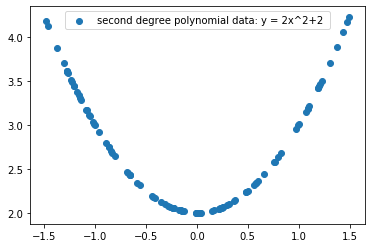

In [121]:
### Start ###
x_poly2, y_poly2 = gen_poly2_data(2, 0, 2)
x_poly2 = np.array(x_poly2)
plt.scatter(x_poly2,y_poly2, label = 'second degree polynomial data: y = 2x^2+2 ')
plt.legend(loc = 'upper center')
### End ###

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b>Q4:</b> Now it's the time to simulate the given polynomial data! We can use different degree of polynomial and end up with the parameters that fit the data. Implement the function <span style='background :yellow' > plot_best_fit_poly </span>which takes in x, y and the desired degree. Please look into function np.ployfit. It should help a lot.

In [122]:
def plot_best_fit_poly(x_s, y_s,deg):
    ### START ###
    coefficients = np.polyfit(x_s, y_s, deg=deg)
    poly = np.poly1d(coefficients)
    new_x = np.linspace(min(x_s), max(x_s))
    new_y = poly(new_x)
    ### END ###
    #plt.figure()
    plt.plot(x_s, y_s,"o", new_x, new_y, linewidth = 3)
    plt.legend(('polynomial data', str(deg)+'th degree approximation'),
           loc='upper right')
    
    #plt.show()
    print('this is best fitted polynomial for degree ' + str(deg))

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
<b> Q5: </b> Now let's visualize! try using polynomial of degree 3,5,10 to model the second degree polynomial example. What do you find?

this is best fitted polynomial for degree 2
this is best fitted polynomial for degree 3
this is best fitted polynomial for degree 5
this is best fitted polynomial for degree 10


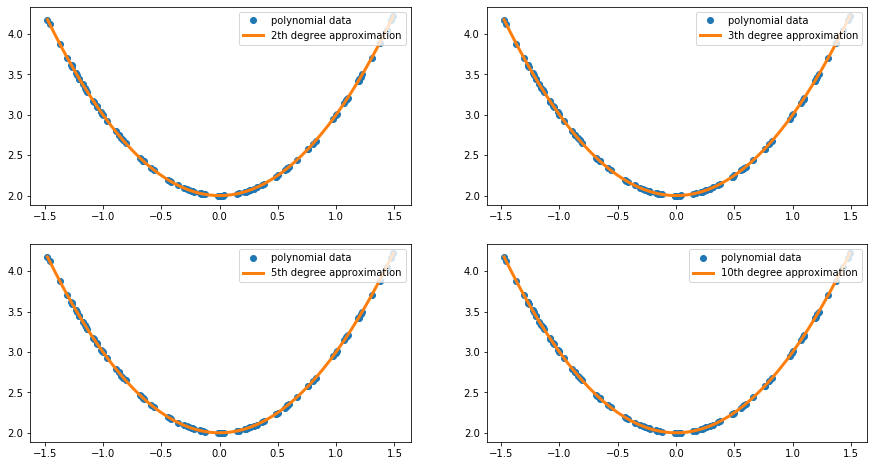

In [123]:
plt.figure(figsize=(15, 8))
plt.subplot(221)
plot_best_fit_poly(x_poly2, y_poly2,degs[0])
plt.subplot(222)
plot_best_fit_poly(x_poly2, y_poly2,degs[1])
plt.subplot(223)
plot_best_fit_poly(x_poly2, y_poly2,degs[2])
plt.subplot(224)
plot_best_fit_poly(x_poly2, y_poly2,degs[3])
plt.show()

<span style="font-family:Georgia; font-size:11.5pt; color: chocolate; line-height:1.5">
<b>Answer:</b>
If we use degree 3,5,100, we will get the same result! Since we are ust putting all the terms over 2 degree to zero. Now it seems that there is an advantage to use higher degree polynomials, since it is more expressive and coudl model all sorts of functions. Is this the real case? Let's go into the next section and examine the case when we have imperfect data from real life.

### 1.3. Imperfect data: the error term

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
In real life, it is almost impossible to get a set of perfect gauched data. There is a thousand ways to get things wrong. In this part, let jump out of the perfect examples and step our foot in the real life scenarios with error. Here we will manually add guassian noise to our second degree data's observation y term. (Find you want to know more about <span style='background :yellow' >gaussian noise </span>check out this page https://www.wikiwand.com/en/Gaussian_function ) <br>
<b> Q1: </b> Implement function add_noise with two parameters: mean and variance of the guassian noise.


In [124]:
def add_noise(mu, var, ys):
    errors = []
    for i in range(len(ys)):
        ### START ###
        errors.append(random.gauss(0,0.5))
    y_with_error = np.add(ys,errors)
    ### END ###
    return y_with_error  

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
Here let the noise term centered around zero and have a variance of 0.5. Let's find the polynomial classifer on this noisy data instead. <br>
    <b> Q2: </b> Plot out the classifier along with the data for at least 5 different degrees of polynomial and write down your observation

this is best fitted polynomial for degree 1
this is best fitted polynomial for degree 4
this is best fitted polynomial for degree 7
this is best fitted polynomial for degree 10
this is best fitted polynomial for degree 13
this is best fitted polynomial for degree 16


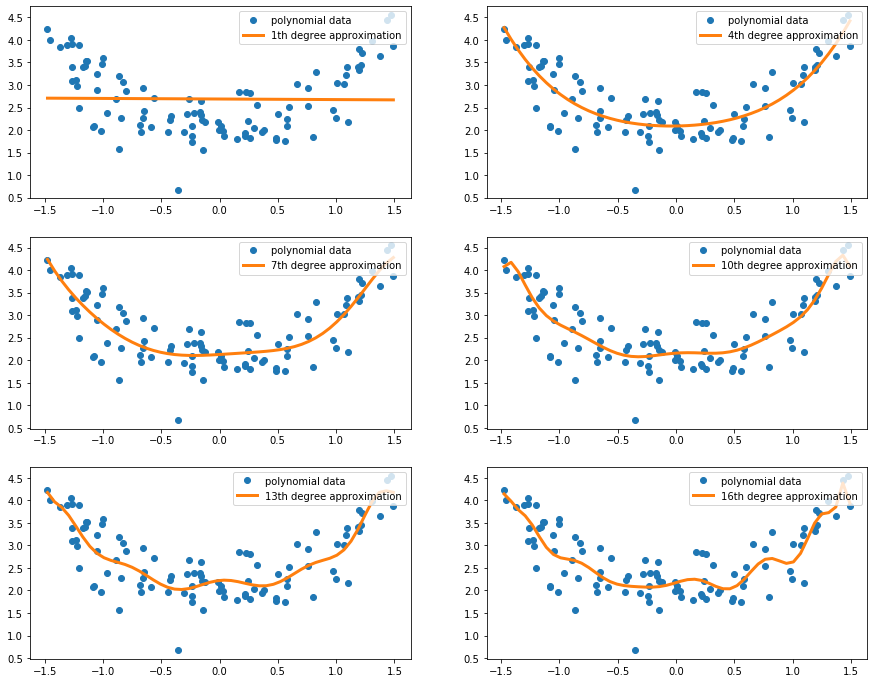

In [125]:
y_with_error = add_noise(0, 0.5, y_poly2)

plt.figure(figsize=(15, 12))
plt.subplot(321)
plot_best_fit_poly(x_poly2, y_with_error, 1)
plt.subplot(322)
plot_best_fit_poly(x_poly2, y_with_error, 4)
plt.subplot(323)
plot_best_fit_poly(x_poly2, y_with_error, 7)
plt.subplot(324)
plot_best_fit_poly(x_poly2, y_with_error, 10)
plt.subplot(325)
plot_best_fit_poly(x_poly2, y_with_error, 13)
plt.subplot(326)
plot_best_fit_poly(x_poly2, y_with_error, 16)
plt.show()

<span style="font-family:Georgia; font-size:11.5pt; color: chocolate; line-height:1.5">
As you can see, as we increase the polynomial term, the decision boundry becomes spiky. We relate this observation to the idea of overfitting: using a too complicated model to capture the nitty gritty of the data while not being able to generalize to other data. We often tie the idea of overfitting to high variance. If you select a bunch of samples from a population repeatedly whiling use an overfitting model, chances are that all the models you get each time will cater to the selected population and will vary to each other a lot. This is what we mean by high variance. In the next section, we will be exploring the bias variance trade off empirically.

## 2. Variance and Bias: a brief recap

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">
In Week 2, we have learned about bias-variance decomposition. We learned about varince bias decomposition which consists of three terms: <span style='background :yellow' >bias of the method, variance of the method and irreducible error. </span>Let's first do a basic exericse to recap the concept. Here are have the ground true function $y = x + sin(1.5x)$ and the observed data is has an error term $ N ~(0,1) $

In [126]:
def gen_true_data(num):
    x_s, y_s = [],[]
    for i in range(num):
        x = random.random() * 4 - 2
        x_s.append(x)
        y_s.append(x+ np.sin(1.5*x))
    return x_s, y_s

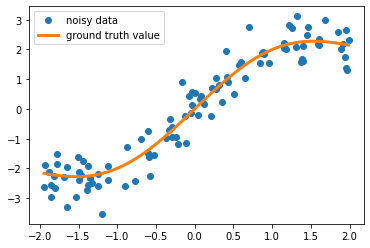

In [127]:
x_obs, y_true = gen_true_data(100)
y_obs = add_noise(0,0.5, y_true)
new_x = np.linspace(min(x_obs), max(x_obs))
new_y = new_x + np.sin(1.5 * new_x)
plt.plot(x_obs, y_obs,'o',new_x, new_y, linewidth = 3)
plt.legend(("noisy data","ground truth value"), loc = "upper left")

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5">  
    <b> Q1:</b> Let's get 20 separate observation data bundle from the underlying function. Write down how would the each dataset be? Why would they be different?

<span style="font-family:Georgia; font-size:11.5pt; color: chocolate; line-height:1.5">
<b>Answer:</b> Since there is an error term $ N~(0,0.5)$ each bundle will be different.

<span style="font-family:Georgia; font-size: 11.5pt; color: dimgray; line-height:1.5">  <b> Q2:</b> Implement the following function to generate a number of data bundles, store them in lists x_data, y_data.

In [128]:
def gen_bundle_data(num):
    x_data,y_data = [],[]
    ### START ###
    for i in range(num):
        x_obs, y_true = gen_true_data(100)
        y_obs = add_noise(0,0.5, y_true)
        x_data.append(x_obs)
        y_data.append(y_obs)
    ### END ###
    return x_data, y_data

In [129]:
x_bundle, y_bundle = gen_bundle_data(20)

<span style="font-family:Georgia; font-size: 11.5pt; color: dimgray; line-height:1.5">  <b> Q3:</b> Implement the following function bias_variance_demo. It should simulate each data bundle with degree 1-4 polynomial and report the following: <span style='background :yellow' >the mean classifier, the variance and bias of the result.</span> </span>

In [130]:
""" Simulate the data with degree 1-4 polynomial and report the variance and bias of the result
"""
def bias_variance_demo(degree):
    coeffs = []
    ### START ###
    for i in range(20):
        x_s = x_bundle[i]
        y_s = y_bundle[i]
        coefficients = np.polyfit(x_s, y_s, deg=degree)
        coeffs.append(coefficients)
        poly = np.poly1d(coefficients)
        new_x1 = np.linspace(min(x_s), max(x_s))
        new_y1 = poly(new_x1)
        #plt.figure()
        plt.plot(new_x1, new_y1, linewidth = 0.5)
    ### END
    mean_coeff = np.mean((coeffs),axis = 0)
    mean_y = np.poly1d(mean_coeff)(new_x)
    plt.plot(new_x, mean_y, linewidth = 3 , label = 'approximation')
    plt.plot(new_x, new_y, linewidth = 3, label = 'ground truth')
    plt.scatter(x_s, y_s,linewidths =0.5,  label = 'data')
    plt.legend(loc = 'upper left')
    plt.title(str(degree) + "th degree polynomial simulation of the function x+ sin(1.5*x)")
    plt.show()
    
        
    bias = abs(sum(mean_y - new_y))
    y_s = []
    for i in range(20):
        coeff = coeffs[i]
        poly = np.poly1d(coeff)
        y_s.append(poly(new_x))    
    variance = np.var(y_s)
    print("bias is " + str(bias))
    print("variance is " + str(variance))
    print("bias**2 + variance = " + str(bias**2+variance))

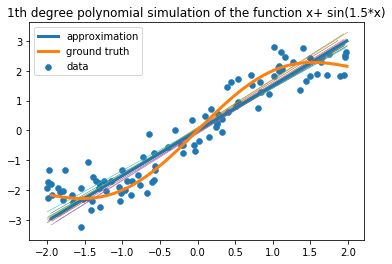

bias is 0.14414198704624015
variance is 3.063825742373897
bias**2 + variance = 3.0846026548035357


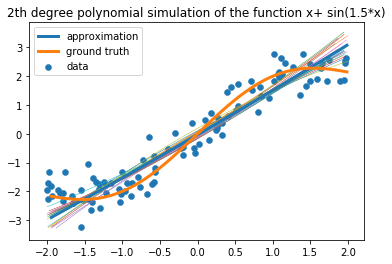

bias is 0.43321421925269865
variance is 3.11290572466944
bias**2 + variance = 3.3005802844321654


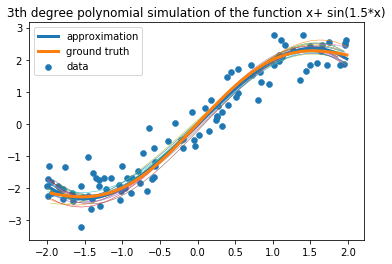

bias is 0.4935023262276027
variance is 3.244541363983996
bias**2 + variance = 3.4880859099760513


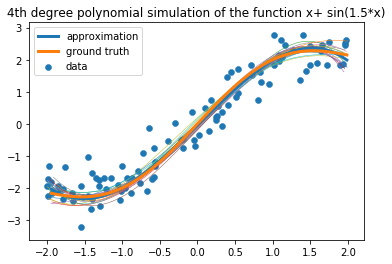

bias is 0.6239021607811702
variance is 3.2457630595480786
bias**2 + variance = 3.635016965775492


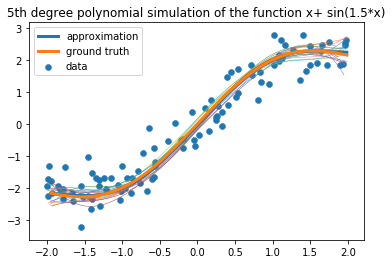

bias is 0.5266186786479251
variance is 3.2593172733126083
bias**2 + variance = 3.536644506013495


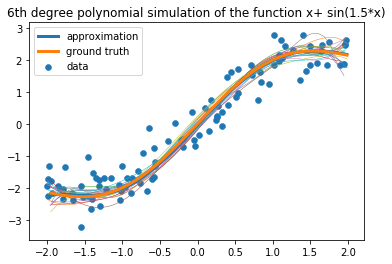

bias is 0.7050619358815938
variance is 3.2719340298366584
bias**2 + variance = 3.769046363265759


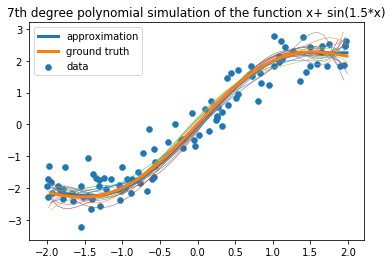

bias is 0.48871066178030853
variance is 3.291032934118485
bias**2 + variance = 3.5298710450562325


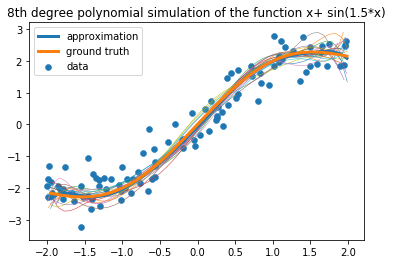

bias is 0.7986317229175509
variance is 3.2914698705820356
bias**2 + variance = 3.9292824994322912


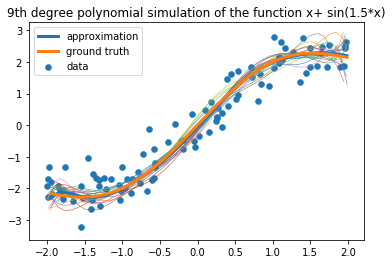

bias is 0.5486178773168163
variance is 3.2998315553068696
bias**2 + variance = 3.6008131306184787


In [131]:
for deg in range(1,10):
    bias_variance_demo(deg)


<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> One would observe that as the degree of polynomial increases the bias is steadily decreasing yet the variance is increasing. Why is that? You should already encounter the concept of bias variance decomposition in previous weeks and in notes.

### 2.1 Bagging: A preliminary experiment

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Indeed, different learners and model classes have different tradeoffs.  
– large bias/small variance: few features, highly regularized, highly pruned decision trees, large-k kNN etc  
– small bias/high variance: many features, less regularization, small-k k-NN etc

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
A natural questions arises as well deal with models with low bias and high variance. How can we prevent them from overfitting? From the previous part, we find that the mean model is much more smoothened out. From there, one natural intuition arises: averaging out the result of the model. In the previous example, we had 20 datasets generated from the underlying ground truth function. In real life, we only have one set of dataset and we do not have the gournd truth function. How could we generate all the datasets? We can simply use our gen_bundle_data function

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q1.</b> Generate noisy x and y data as well as testing data (30 data points) using previously defined function.

In [133]:
'''Generate noisy x and y data'''
x_noisy, y_noisy = gen_bundle_data(1)

In [134]:
'''Generate standard test data '''
x_test, y_test = gen_true_data(30)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q2.</b> Code up the function that computes regression error for bagging learner. It should take in training data, testing data, number of bagging process and the degree of polynomial as its paramters.

In [142]:
def bagging_poly_error(x_train,y_train,degree, iteration,x_test, y_test):
    y_pred = []
    for i in range(iteration):
        idx = random.sample(range(100),80)
        train_x,train_y = np.array(x_train)[idx],np.array(y_train)[idx]
        coefficients = np.polyfit(train_x,train_y, deg=degree)
        poly = np.poly1d(coefficients)
        y_pred.append(poly(x_test)) 
        
    ### START ###
    return np.abs(np.sum(np.mean(y_pred, axis = 0) - y_test)) 

In [143]:
bagging_errors = []
for i in range(2,20,2):
    bagging_error = []
    for i in range (1,30,3):
        bagging_error.append(bagging_poly_error(x_noisy[0],y_noisy[0],16,i,x_test, y_test))
    bagging_errors.append(bagging_error)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q3.</b> Code up the function that computes regression error for polynomial learner

In [144]:
'''Code up the function that computes regression error for polynomial learner'''
def poly_error(x_train,y_train,degree, x_test, y_test):
    train_x,train_y = np.array(x_train),np.array(y_train)
    coefficients = np.polyfit(train_x,train_y, deg=degree)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_test)
    return np.abs(np.sum(y_pred - y_test))

In [145]:
regression_errors = []
for i in range(2,20,2):
    k = poly_error(x_noisy[0],y_noisy[0],16,x_test, y_test)
    regression_errors.append(k)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q4.</b> Now, plot out the bagging error of different iterations.

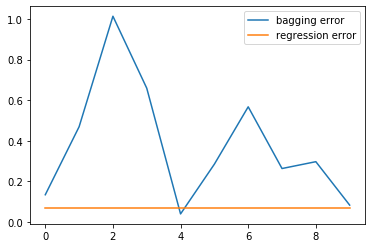

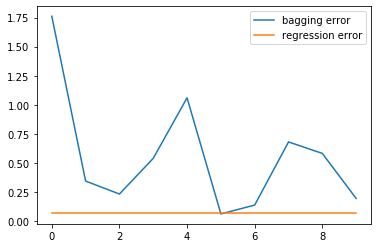

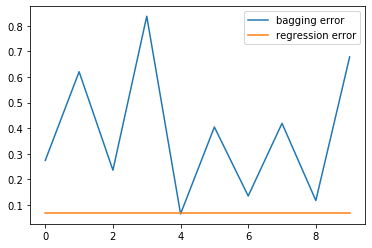

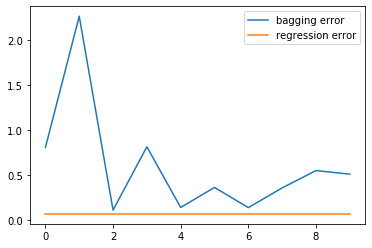

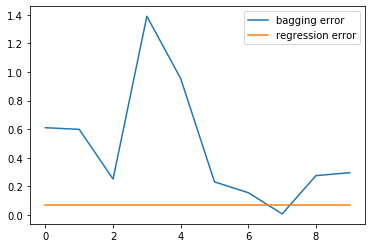

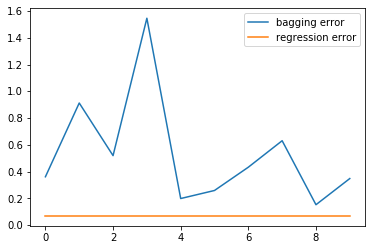

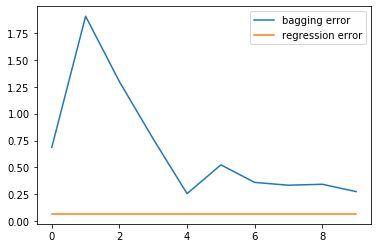

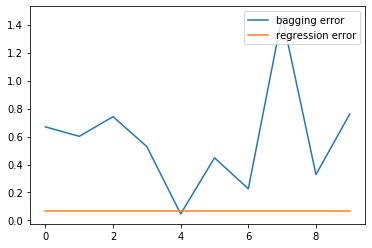

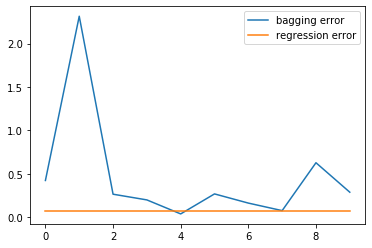

In [146]:
'''Plot out the errors and observe'''
for i in range(9):
    plt.figure()
    plt.plot(bagging_errors[i],label = 'bagging error')
    plt.plot( np.ones(10)*regression_errors[i],label = 'regression error')
    plt.legend(loc = 'upper right')

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Comment on what you observe. You can see there is almost always certain times that bagging error is lower than regression error.

### 2.2 Bagging Theory

<img src="https://miro.medium.com/max/700/1*_pfQ7Xf-BAwfQXtaBbNTEg.png" width = 500pt>
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
From the previous example, we can see that bagging can somehow avoid overfitting and get some pretty good result. From a theoretic pespective how does it really work?

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
When we do bagging, we first bootstrap M different samples without replacement from the population. Since we are sampling without replacement, then these samples are independent of each other. Thus we name them as $Y_1, Y_2, ..., Y_m$ independent random variables each with mean $\mu$ and variance $\sigma ^2$. As we average them, we are basically taking the expectation of the following terms which you will see is still $\mu$ $$ \frac{1}{M}  \sum_{i=1}^{M} Y_i = \frac{1}{M} \times {M \mu} = \mu $$ Therefore after all these mumble jumbles we still get that good low bias. As for variance, let's do our calculation: $$ var(\frac{1}{M}\sum_{i=1}^{M} Y_i) = \frac{1}{M^2} \times var(\sum_{i=1}^{M} Y_i) = \frac{1}{M^2} \times \sigma^2 \times M  = \frac{\sigma^2} {M} $$ As we can see the variance goes down linearly as M increases. This is the exact reason why we are able to get a better result in the end.

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q1.</b> Now, observe the following results of applying bagging to <span style='background :yellow' >two exising dataset: the Iris Dataset and the Boston Housing Dataset</span> Here the base learner is decision tree and the bagged learned is random forest. Look into function <span style='background :yellow' > bias_variance_decomp </span >
</span>

#### Iris Example

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q2.</b> Report the average bias of one single decision tree classifier. </span>

In [114]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)



tree = DecisionTreeClassifier(random_state=123)

### START ###
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)
### end ###

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.062
Average bias: 0.022
Average variance: 0.040


In [ ]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        random_state=123)

### START ###
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)
### END ###

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

#### Boston housing data example

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> Now let's do the same thing to to Boston housing data. Only this time you will implement the train_test_splot and decision tree/ bagged decision tree yourself.

In [ ]:
from mlxtend.data import boston_housing_data


X, y = boston_housing_data()
### START ###
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)



tree = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
### END ###
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

In [ ]:
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor(random_state=123)
### START ###
bag = BaggingRegressor(base_estimator=tree,
                       n_estimators=100,
                       random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
### END ###

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

### 3.0 Extracting Feature from the original csv File

In [ ]:
df = pd.read_csv('Admission_Predict.csv', index_col='Serial No.')
df = df.dropna()
df

In [ ]:
X = df.drop('Chance of Admit ', axis=1)

In [ ]:
y_val = df['Chance of Admit '].values
y_val[y_val>0.8] = 1
y_val[y_val != 1] = 0
df['Chance of Admit '] = y_val
y = df['Chance of Admit ']
df

## 3. Bootstrap

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
If we randomly select some observations from dataset and use the sample to estimate some unknown value we want only once, the value cannot represent the real one. Instead, we can select sample multiple time, and average the value we found each time.It will make our prediction closer to the real value. That is the idea of Bootstrap. It is robustness and high efficiency because we do not need to add additional data.
Bootstrap can also be used to create randomness in data.
<img src="https://habrastorage.org/webt/n0/dg/du/n0dgduav1ygc3iylumtwjcn15mu.png" width = 500>

*Cite: Image from https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging*  

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Your task for this part is to use Bootstraping to find the average GRE score for students with `Chance of Admit` > 0.8.

    
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
    <b>Q1.</b> Before we actually start, let try to find the mean of `GRE Score` in this whole dataset.

In [ ]:
real_mean = np.mean(df["GRE Score"])
print(real_mean)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q2.</b> Select 320 students randomly without replacement, and store the content in the variable called `sample`.

In [ ]:
sample = df.sample(320, replace=False)
sample.head()

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q3.</b>
In `sample` dataframe, find the average of GRE Score.

In [ ]:
mean = np.mean(sample['GRE Score'])
mean

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q4.</b> Part (b) and (c) show the process of sampleing and finding the mean of sampled `GRE Score`. Now complete bootstrap function, so that we can run this processes multiple times. 

In [ ]:
def bootstrap(dataframe, n):
    avg = []
    for i in np.arange(n):
        bootstrap_sample = dataframe.sample(320, replace=False)
        new_avg = np.mean(bootstrap_sample['GRE Score'])
        avg = np.append(avg, new_avg)
    
    mean = np.mean(avg)
    return mean

In [ ]:
bootstrap(df, 300)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b>Q5.</b> Compare with `onetime_mean`, `bootstrap_mean`, which one is closer to the `real_mean`? What can you conclude?

<span style="font-family:Georgia; font-size:11.5pt; color: chocolate; line-height:1.5">
Solution: bootstrap_mean is closser to the real_mean, so Bootstrap will give us higher accuracy than just sample the data once.*

## 4. K-Fold Cross-Validation
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
In the case of insufficient dataset, we can use K-Fold Cross-Validation to maximize the use of the dataset. 
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
As you can see in the following image, after separate the dataset into training set and test set, we initialize k, which is the number of folds that we want to separate in the training set. Then we separate the training set into k equally sized subset by using KFold() function. Then we can train our model on each split, and get the corresponding error rate each time. Finally, we average the error, and use it as an estimate of the accuracy of the model algorithm.

<img src="https://www.textbook.ds100.org/_images/bias_cv_5_fold_cv.jpg" width = 600>
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
*Cite: Image from:https://www.textbook.ds100.org/ch/15/bias_cv.html?highlight=cross#k-fold-cross-validation*
    <br>
In this part, we will use linear regression model to predicts TOEFL Score from GRE Score.
<br>
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b> Q1. </b>First, draw a scatter plot between `df['GRE Score']` and `df['TOEFL Score']`. Also set the title and axises.

In [ ]:
plt.scatter(df['GRE Score'], df['TOEFL Score'])
plt.title("GRE vs TOEFL")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b> Q2. </b>Split the dataframe into 5 part, i.e. `numsplit` = 5, and compute `k_fold`.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 

X_tr, X_te, Y_tr, Y_te = train_test_split(X, y, test_size=0.25)

numsplit = 5
k_fold = KFold(numsplit,shuffle=True, random_state=42)


<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
<b> Q3. </b> Build linear regression model and finish `rmse` function.

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

def rmse(y_real, y_predict):
    return np.sqrt(np.mean((y_real - y_predict) ** 2))

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
    <b> Q4. </b> Finish `rmse_kfold` function, and print the average rmse error.

In [ ]:
def rmse_kfold(X_tr):
    err = []
    for train_idx, valid_idx in k_fold.split(X_tr):
        split_X_train, split_X_valid = X_tr.iloc[train_idx], X_tr.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_tr.iloc[train_idx], Y_tr.iloc[valid_idx]
        model.fit(split_X_train,split_Y_train)

    train_err = rmse(split_Y_valid,model.predict(split_X_valid))
    err.append(train_err)
    return np.mean(err)


In [ ]:
rmse_err = rmse_kfold(X_tr)
print("The rmse error by using K-Fold is", rmse_err)

## 5. Decision Tree and Bagging
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Now let's briefly introduce you to decision tree. Tree-based algorithms are a popular family of related non-parametric and supervised methods for both classification and regression. If you're wondering what supervised learning is, it's the type of machine learning algorithms which involve training models with data that has both input and output labels (in other words, we have data for which we know the true class or values, and can tell the algorithm what these are if it predicts incorrectly).

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
The decision tree looks like a vague upside-down tree with a decision rule at the root, from which subsequent decision rules spread out below. 

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Suppose we have four objects to classify: hawk, penguin, dolphin, and bear. It turns out that we can use a decision tree to correctly classify these four animals based on three features: "has feathers?", "Can fly", and "Has finns"

<img src="https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png" width = 500>

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
            A numerical representation of decision tree will be a threshold of a specific feature. Let's look at our data as an example. We limit our decision tree depth to 3 to prevent overfitting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree
dt = DecisionTreeClassifier(max_depth = 3)
predY = dt.fit(X_tr, Y_tr).predict(X_te)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print("Accuracy of a single decision tree:" + str(accuracy_score(Y_te, predY)))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
axes.set_title('College Admission Decision Tree')
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   filled=True)

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
It turns out that GPA is still the most important feature for graduate school admission, followed by TOEFL and GRE. Go bears!

### 5.1 Overfitting
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Overfitting: Or Why a Forest is better than One Tree
The reason the decision tree is prone to overfitting when we don’t limit the maximum depth is because it has unlimited flexibility, meaning that it can keep growing until it has exactly one leaf node for every single observation, perfectly classifying all of them. But we have reduced the variance of the decision tree but at the cost of increasing the bias, resulting in a lower test accuracy


In [ ]:
dt = DecisionTreeClassifier(max_depth = 100) #TODO: change max_depth here
dt = dt.fit(X_tr, Y_tr)
predY_tr = dt.predict(X_tr)
predY_tr[predY_tr >= 0.5] = 1
predY_tr[predY_tr != 1] = 0
predY = dt.predict(X_te)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print("Training accuracy:" + str(accuracy_score(Y_tr, predY_tr)))
print("Testing accuracy:" + str(accuracy_score(Y_te, predY)))

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Q. Try out on the different max depth of decision tree and report when the accuracy reaches 1 for training data and when the test accuracy reaches maximum.

<span style="font-family:Georgia; font-size:11.5pt; color: chocolate; line-height:1.5">
   Solution: Accuracy reaches 1 on 14, and test accuracy reaches maximum around 4

### 5.2 Bagging them together
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
Intuitively, a single tree may not be clever enough to classify our master school students. Now our goal is to implement a model that bags results of multiple decision trees and explore whether bagging is actually going to improve our model.

In [ ]:
from sklearn.utils import resample
class BaggedTrees:

    def __init__(self, params=None, n=200):
        if params is None:
            params = {}
        self.params = params
        self.n = n
        self.decision_trees = [
            DecisionTreeClassifier(max_depth = 3, random_state = i, **self.params)
            for i in range(self.n)
        ]

    def fit(self, X, y):
        for i in range(self.n):
            #change the following line with bootstrapping
            self.decision_trees[i].fit(X_tr, Y_tr)
            #solution
            newX, newy = resample(X_tr, Y_tr, replace = True)
            self.decision_trees[i].fit(newX, newy)
        return self

    def predict(self, X):
        yhat = [self.decision_trees[i].predict(X) for i in range(self.n)]
        # TODO: compute yhat_avg for BaggedTrees
        # HINT: take the average and predict results, note that our prediction only consists of 0 and 1
        ### start code ###
        yhat_avg = np.average(yhat, axis = 0)
        yhat_avg = np.array([int(np.heaviside(i-1/2, 1/2)) for i in yhat_avg])
        ### end code ###
        return yhat_avg

In [ ]:
bt = BaggedTrees()
predY = bt.fit(X_tr, Y_tr).predict(X_te)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print(accuracy_score(Y_te, predY))

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
As you can see the accuracy of testing data is getting better after averaging the result from 100 decision trees or any number of decision trees (change n).

### 5.3 Random Forest

<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
You just implemented a random forest by yourself! Congratulations. Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
But why do we call it a “random” forest? That’s because it is a forest of randomly created decision trees. As you can see from the skeleton code above -- we set the random state for each decision tree and thus each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.
<span style="font-family:Georgia; font-size:11.5pt; color: dimgray; line-height:1.5"> 
And that is our bagged trees. Let's see the result of random forest implemented by sklearn.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 3,n_estimators = 50,random_state=1)
predY = rf.fit(X_tr, Y_tr).predict(X_te)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print(accuracy_score(Y_te, predY))

<img src = "https://miro.medium.com/max/500/1*10t9S7xvWE5Z3NEZrmHG2w.jpeg">
<center>This is bagging, try to get the intuition here.</center>

# Reference
https://blog.paperspace.com/decision-trees/

https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e

https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging 

https://www.textbook.ds100.org/ch/15/bias_cv.html?highlight=cross#k-fold-cross-validation